In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missing_bayesian_mixture as mbm

from sklearn import datasets
from sklearn.mixture import GaussianMixture
import imp

In [3]:
iris = datasets.load_iris()
mask = np.random.rand(iris.data.shape[0]) < 0.2
X_train = iris.data[~mask,:]
y_train = iris.target[~mask]
X_test = iris.data[mask,:]
y_test = iris.target[mask]
X_train[np.random.rand(*X_train.shape) < 0.3] = np.nan
n_classes = len(np.unique(y_train))

In [4]:
colors = ['navy', 'turquoise', 'darkorange', 'green', 'red']*2

def make_ellipses(gmm, ax, i_colors):
    for n, color in i_colors:
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        else:
            raise ValueError
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
    
def plot(estimator, name="BGMM"):
    plt.figure()
    estimator.fit(X_train)
    Y = estimator.predict(X_test)
    Y_ = estimator.predict(X_train)

    h = plt.subplot(1, 1, 1)
    make_ellipses(estimator, h, filter(lambda t: np.any(Y==t[0]) or np.any(Y_==t[0]), enumerate(colors)))

    for n, color in enumerate(colors):
        if np.any(Y==n) or np.any(Y_==n):
            data = iris.data[iris.target == n]
            plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color)
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        if len(data) != 0:
            plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

    plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


    plt.show()

/home/adria/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


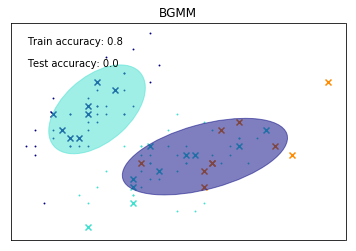

In [19]:
imp.reload(mbm)
m = mbm.BayesianMixtureMissingData(n_components=3, n_init=5, init_params='random')
plot(m)

In [6]:
m2 = GaussianMixture(n_components=3, covariance_type='full', max_iter=1000)
plot(m2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').